In [1]:
from ctypes import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tkinter import *
from PIL import ImageTk, Image
import cv2
from tifffile import imsave
import os
import time
from pypylon import pylon
import time, os, fnmatch, shutil
import numpy as np
import nidaqmx
from nidaqmx.constants import AcquisitionType, Edge
with nidaqmx.Task() as task:
    task.ao_channels.add_ao_voltage_chan('Dev1/ao1')
    task.ao_channels.all.ao_max = 10
    task.ao_channels.all.ao_min = -10
from pypylon import genicam

In [2]:
#define camera functions
def Save_BF():
    t = time.localtime()
    timestamp = time.strftime('%b%d%Y_%H%M', t)
    BACKUP_NAME = ("capsules_adipo_BF" + timestamp)
    suffix='.tif'
    dir_name='C:/Users/Amaury/Documents/incubascope/manipe_capsule2/bright'
    total=os.path.join(dir_name,BACKUP_NAME + suffix)
    imsave(total,img_BF)
    
def Save_FLUO():
    t = time.localtime()
    timestamp = time.strftime('%b%d%Y_%H%M', t)
    BACKUP_NAME = ("capsules_adipo_FLUO" + timestamp)
    suffix='.tif'
    dir_name='C:/Users/Amaury/Documents/incubascope'
    total=os.path.join(dir_name,BACKUP_NAME + suffix)
    imsave(total,img_FLUO)    
    

def Save_FLUO2():
    t = time.localtime()
    timestamp = time.strftime('%b%d%Y_%H%M', t)
    BACKUP_NAME = ("capsules_adipo_FLUO2" + timestamp)
    suffix='.tif'
    dir_name='C:/Users/Amaury/Documents/incubascope/manipe_capsule2/fluo'
    total=os.path.join(dir_name,BACKUP_NAME + suffix)
    imsave(total,img_FLUO2)    
    
    
def Snapshot():
# Grabing Continusely (video) with minimal delay
    camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
    converter = pylon.ImageFormatConverter()
# converting to opencv bgr format
    converter.OutputPixelFormat = pylon.PixelType_BGR8packed
    converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)    
        # Access the image data
    image = converter.Convert(grabResult)
    img = image.GetArray()        
# Releasing the resource    
    camera.StopGrabbing()
    plt.imshow(img)
    
def Exposure(a):
    # Print the model name of the camera.
    #print("Using device ", camera.GetDeviceInfo().GetModelName())
    camera.MaxNumBuffer = 2
    try:
        camera.Gain = camera.Gain.Max
    
    except genicam.LogicalErrorException:
         camera.GainRaw = camera.GainRaw.Max
    camera.Width = camera.Width.Max
    camera.Height = camera.Height.Max
    # camera.ExposureTime = camera.ExposureTime.Min
    camera.PixelFormat = "Mono12"
    camera.ExposureTime.SetValue(a)
    
def video_stream():
    img = Image.fromarray(cv2.resize(II, dsize=(600,600), interpolation=cv2.INTER_CUBIC))
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk    
    lmain.configure(image=imgtk)  
    lmain.after(1, video_stream)         
    
def SetIllumination2_BIS(a):    
    percent2=a/100*5
    with nidaqmx.Task() as task:
        task.ao_channels.add_ao_voltage_chan('Dev1/ao1')
        task.timing.cfg_samp_clk_timing(1000)
        print('1 Channel 1 Sample Write: ')
        print(task.write(percent2))
    with nidaqmx.Task() as task:
        task.ao_channels.add_ao_voltage_chan('Dev1/ao1')
        task.timing.cfg_samp_clk_timing(1000)
        print('1 Channel 1 Sample Write: ')
        print(task.write(percent2))
        
def SetIllumination1_BIS(a):    
    percent2=a/100*5
    with nidaqmx.Task() as task:
        task.ao_channels.add_ao_voltage_chan('Dev1/ao0')
        task.timing.cfg_samp_clk_timing(1000)
        print('1 Channel 1 Sample Write: ')
        print(task.write(percent2))
    with nidaqmx.Task() as task:
        task.ao_channels.add_ao_voltage_chan('Dev1/ao0')
        task.timing.cfg_samp_clk_timing(1000)
        print('1 Channel 1 Sample Write: ')
        print(task.write(percent2))        
        
def Snapshot_BF():
# Grabing Continusely (video) with minimal delay
    SetIllumination2_BIS(80)
    SetIllumination1_BIS(0)
    time.sleep(1)
    camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
    converter = pylon.ImageFormatConverter()
# converting to opencv bgr format
    converter.OutputPixelFormat = pylon.PixelType_Mono16
    converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)    
        # Access the image data
    image = converter.Convert(grabResult)
    img = image.GetArray()        
# Releasing the resource    
    camera.StopGrabbing()
    SetIllumination2_BIS(0)    
    SetIllumination1_BIS(0)   
    plt.imshow(img)         
    return img
    
    
def Snapshot_FLUO():
# Grabing Continusely (video) with minimal delay
    SetIllumination2_BIS(0)
    SetIllumination1_BIS(100)
    time.sleep(1)
    camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
    converter = pylon.ImageFormatConverter()
# converting to opencv bgr format
    converter.OutputPixelFormat = pylon.PixelType_Mono16
    converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)    
        # Access the image data
    image = converter.Convert(grabResult)
    img = image.GetArray()        
# Releasing the resource    
    camera.StopGrabbing()
    SetIllumination2_BIS(0)    
    SetIllumination1_BIS(0)   
    plt.imshow(img)        
    return img
        

In [3]:
#camera initialization
camera = pylon.InstantCamera(
pylon.TlFactory.GetInstance().CreateFirstDevice())

camera.Open()

    # Print the model name of the camera.
camera.MaxNumBuffer = 2

camera.Width = camera.Width.Max
camera.Height = camera.Height.Max
    # camera.ExposureTime = camera.ExposureTime.Min
camera.PixelFormat = "Mono12"
camera.ExposureTime.SetValue(20)

1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1


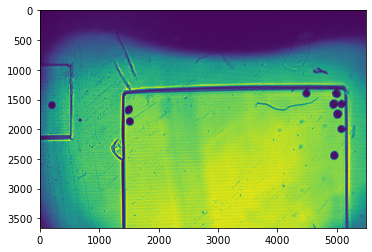

In [4]:
Exposure(20)
img=Snapshot_BF()

In [5]:
#TEST LIVE BRIGHT FIELD
from pypylon import pylon
import cv2

SetIllumination2_BIS(80)  
# conecting to the first available camera
#camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_Mono16
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        img = image.GetArray()
        cv2.namedWindow('title', cv2.WINDOW_NORMAL)
        cv2.imshow('title', img)
        k = cv2.waitKey(1)
        if k == 27:
            break
    grabResult.Release()
    
# Releasing the resource    
camera.StopGrabbing()

cv2.destroyAllWindows()

1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1


1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1


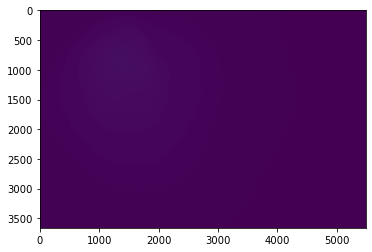

In [6]:
Exposure(25000)
img=Snapshot_FLUO()

In [7]:
#TEST LIVE FLUO
from pypylon import pylon
import cv2

SetIllumination2_BIS(0)  
SetIllumination1_BIS(100)  
# conecting to the first available camera
#camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_Mono16
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        img = image.GetArray()
        cv2.namedWindow('title', cv2.WINDOW_NORMAL)
        cv2.imshow('title', img)
        k = cv2.waitKey(1)
        if k == 27:
            break
    grabResult.Release()
    
# Releasing the resource    
camera.StopGrabbing()

cv2.destroyAllWindows()

1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1


1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1


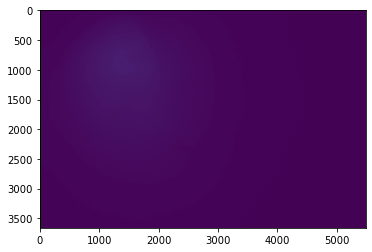

In [8]:
Exposure(50000)
img=Snapshot_FLUO()

In [9]:
#TEST LIVE FLUO 2 = + fort
from pypylon import pylon
import cv2

SetIllumination2_BIS(0)  
SetIllumination1_BIS(100)  
# conecting to the first available camera
#camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_Mono16
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        img = image.GetArray()
        cv2.namedWindow('title', cv2.WINDOW_NORMAL)
        cv2.imshow('title', img)
        k = cv2.waitKey(1)
        if k == 27:
            break
    grabResult.Release()
    
# Releasing the resource    
camera.StopGrabbing()

cv2.destroyAllWindows()

1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1


In [ ]:
#ACQUISITION LOOP

camera.Close()
for ii in range(300):
    #camera initialization
    camera = pylon.InstantCamera(
    pylon.TlFactory.GetInstance().CreateFirstDevice())
    camera.Open()
    # Print the model name of the camera.
    camera.MaxNumBuffer = 2
    camera.Width = camera.Width.Max
    camera.Height = camera.Height.Max
    # camera.ExposureTime = camera.ExposureTime.Min
    camera.PixelFormat = "Mono12"
    camera.ExposureTime.SetValue(20)    
    img_BF=Snapshot_BF()
#    camera.ExposureTime.SetValue(50000)    #INSERT ACQUISITION TIME LONG
#   img_FLUO=Snapshot_FLUO()
    camera.ExposureTime.SetValue(25000)    #INSERT ACQUISITION TIME SHORT
    img_FLUO2=Snapshot_FLUO()
    camera.Close()    
    Save_BF() 
#    Save_FLUO()  
    Save_FLUO2()  
    time.sleep(7200)
    

1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sa

1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sa

1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sample Write: 
1
1 Channel 1 Sa

In [ ]:
camera.ExposureTime.SetValue(100000)    
img_FLUO=Snapshot_FLUO()
Save_FLUO()
camera.ExposureTime.SetValue(150000)    
img_FLUO2=Snapshot_FLUO()
Save_FLUO2()

In [ ]:
Save_FLUO2()